In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
figure_size = (3, 3.5)

In [79]:
# NYU-METS-M15-Standard
TPA_LSTM_rmse = [4.0038, 4.6102, 5.0779, np.nan, np.nan, np.nan, np.nan]
Bi_LSTM_64_rmse = [4.035, 4.385, 4.711, 5.707, 7.246, 8.798, 9.432]
BandFormer_s_rmse = [4.072, 4.391, 4.71, 5.371, 6.416, 7.681, 8.855]
#BandFormer_m_rmse = [4.133, 4.348, 4.556]
EWMA8_rmse = [4.450941296, 4.658181359, 4.852012059, 5.345057383, 6.043067128, 7.010186404, 8.157147761]
Shifted_rmse = [4.661624432, 4.874304771, 5.090734005, 5.676420689, 6.483739376, 7.508473873, 8.724534035]

index = [1, 2, 3, 6, 12, 24, 48]
df_rmse = pd.DataFrame(
    {'TPA_LSTM': TPA_LSTM_rmse, 
     'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'BandFormer_s': BandFormer_s_rmse, 
     #'BandFormer_m': BandFormer_m_rmse, 
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,TPA_LSTM,Bi_LSTM_64,BandFormer_s,EWMA8,Shifted
1,4.0038,4.035,4.072,4.450941,4.661624
2,4.6102,4.385,4.391,4.658181,4.874305
3,5.0779,4.711,4.710,4.852012,5.090734
6,NaN,5.707,5.371,5.345057,5.676421
12,NaN,7.246,6.416,6.043067,6.483739
24,NaN,8.798,7.681,7.010186,7.508474
48,NaN,9.432,8.855,8.157148,8.724534


In [80]:
""" plt.figure(figsize=figure_size, dpi=200)
#plt.rcParams.update({'font.size': 18})
#plt.xlim(left=0, right=3)
#plt.ylim(bottom=3, top=5.1)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')
plt.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the NYU-METS LTE dataset (RMSE)')
plt.legend(loc='lower right')
#plt.savefig(f'plots/NYU-METS-comparison-RMSE.pdf', bbox_inches='tight') """

' plt.figure(figsize=figure_size, dpi=200)\n#plt.rcParams.update({\'font.size\': 18})\n#plt.xlim(left=0, right=3)\n#plt.ylim(bottom=3, top=5.1)\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\nplt.plot(index, df_rmse[\'TPA_LSTM\'], "-o", color="c", label="TPA-LSTM")\nplt.plot(index, df_rmse[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_rmse[\'BandFormer_s\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_rmse[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_rmse[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the NYU-METS LTE dataset (RMSE)\')\nplt.legend(loc=\'lower right\')\n#plt.savefig(f\'plots/NYU-METS-comparison-RMSE.pdf\', bbox_inches=\'tight\') '

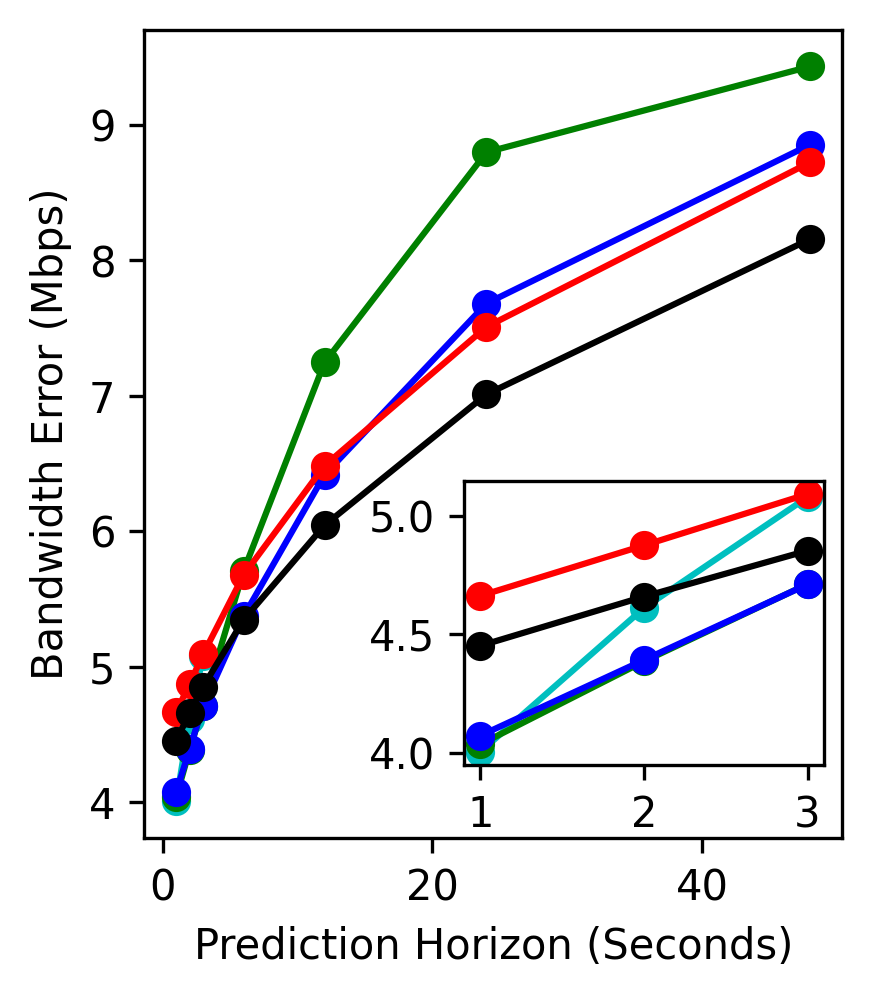

In [81]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=300)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth Error (Mbps)')
#ax1.set_xlim(left=0, right=50)
#ax1.set_ylim(bottom=0, top=55)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.48, 0.18, 0.4, 0.27]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)

ax1.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
ax1.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
ax1.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer")
ax1.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
#ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)

scope_s = 0
scope_e = 3
ax2.plot(index[scope_s:scope_e], df_rmse['TPA_LSTM'][scope_s:scope_e], "-o", color="c", label="TPA-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8")

plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-RMSE.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-RMSE.png', bbox_inches='tight')

In [82]:
# NYU-METS-M15-Standard
TPA_LSTM_mae = [2.9043, 3.2362, 3.5488, np.nan, np.nan, np.nan, np.nan]
Bi_LSTM_64_mae = [2.906, 3.141, 3.383, 4.111, 5.335, 6.614, 7.227]
BandFormer_s_mae = [2.978, 3.187, 3.439, 3.945, 4.837, 5.91, 6.894]
#BandFormer_m_mae = [3.015, 3.114, 3.244]
EWMA8_mae = [3.151693978, 3.260105822, 3.372102351, 3.682077902, 4.153662244, 4.896394897, 5.84909462]
Shifted_mae = [3.34493947, 3.41438055, 3.532197952, 3.91144371, 4.463725567, 5.237546444, 6.259940624]

index = [1, 2, 3, 6, 12, 24, 48]
df_mae = pd.DataFrame(
    {'TPA_LSTM': TPA_LSTM_mae, 
     'Bi_LSTM_64': Bi_LSTM_64_mae, 
     'BandFormer_s': BandFormer_s_mae, 
     #'BandFormer_m': BandFormer_m_mae, 
     'EWMA8': EWMA8_mae, 
     'Shifted': Shifted_mae,
     })
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,TPA_LSTM,Bi_LSTM_64,BandFormer_s,EWMA8,Shifted
1,2.9043,2.906,2.978,3.151694,3.344939
2,3.2362,3.141,3.187,3.260106,3.414381
3,3.5488,3.383,3.439,3.372102,3.532198
6,NaN,4.111,3.945,3.682078,3.911444
12,NaN,5.335,4.837,4.153662,4.463726
24,NaN,6.614,5.910,4.896395,5.237546
48,NaN,7.227,6.894,5.849095,6.259941


In [83]:
""" plt.figure(figsize=figure_size, dpi=200)
#plt.xlim(left=0, right=3)
#plt.ylim(bottom=0, top=6)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')

plt.plot(index, df_mae['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_mae['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the NYU-METS LTE dataset (MAE)')
plt.legend(loc='lower right')
#plt.savefig(f'plots/NYU-METS-comparison-MAE.pdf', bbox_inches='tight') """

' plt.figure(figsize=figure_size, dpi=200)\n#plt.xlim(left=0, right=3)\n#plt.ylim(bottom=0, top=6)\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\n\nplt.plot(index, df_mae[\'TPA_LSTM\'], "-o", color="c", label="TPA-LSTM")\nplt.plot(index, df_mae[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_mae[\'BandFormer_s\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_mae[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_mae[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the NYU-METS LTE dataset (MAE)\')\nplt.legend(loc=\'lower right\')\n#plt.savefig(f\'plots/NYU-METS-comparison-MAE.pdf\', bbox_inches=\'tight\') '

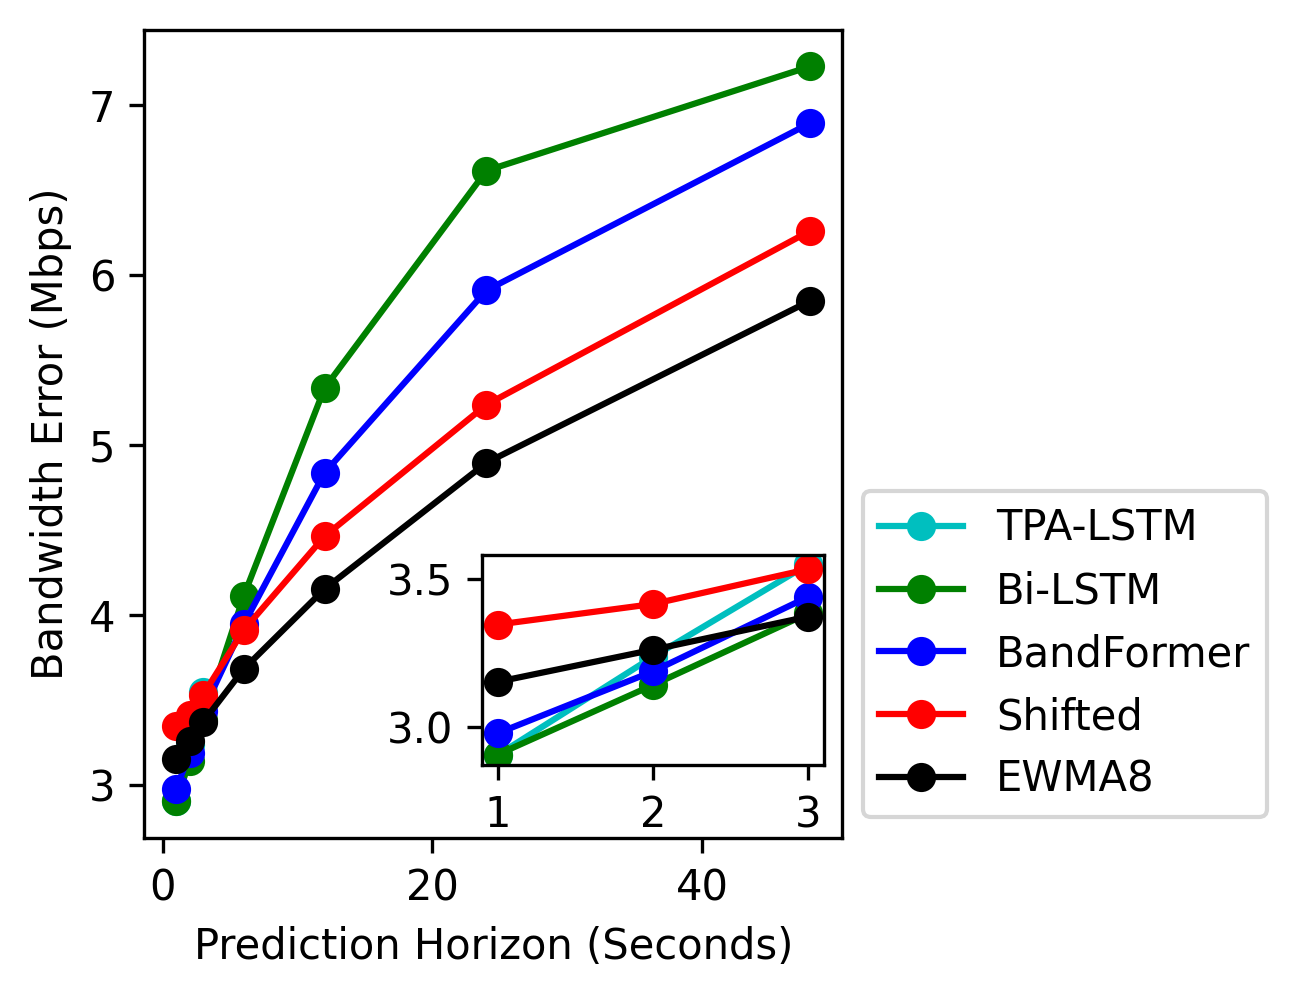

In [84]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=300)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth Error (Mbps)')
#ax1.set_xlim(left=0, right=50)
#ax1.set_ylim(bottom=0, top=40)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.5, 0.18, 0.38, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)

ax1.plot(index, df_mae['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
ax1.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
ax1.plot(index, df_mae['BandFormer_s'] , "-o", color="b", label="BandFormer")
ax1.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))

scope_s = 0
scope_e = 3
ax2.plot(index[scope_s:scope_e], df_mae['TPA_LSTM'][scope_s:scope_e], "-o", color="c", label="TPA-LSTM")
ax2.plot(index[scope_s:scope_e], df_mae['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_mae['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_mae['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8")

#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-MAE.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-MAE.png', bbox_inches='tight')

In [85]:
# Beyond5G
Informer_based_rmse = [0.72, 0.84, 0.97, 1.19, 1.27, 1.33, 1.36]
Bi_LSTM_64_rmse = [0.3569, 0.4287, 0.555, 0.689, 0.7534, 0.7882, 0.8498]
TPA_LSTM_rmse = [100, 101, 102, 103, 104, 105, 106]

BandFormer_s_rmse = [0.4036, 0.4663, 0.5251, 0.617, 0.69, 0.7496, 0.8028]
EWMA8_rmse = [0.6565267368, 0.7075663508, 0.7459498499, 0.8141910554, 0.8550746592, 0.9229828446, 1.000574414]
Shifted_rmse = [0.5107146336, 0.6282143495, 0.7123582184, 0.8651275954, 0.9554251409, 1.040175844, 1.126359413]
						
df_rmse = pd.DataFrame(
    {'Informer_based': Informer_based_rmse, 
     'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'TPA_LSTM': TPA_LSTM_rmse, 
     'BandFormer_s': BandFormer_s_rmse, 
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })
index = [1, 2, 3, 6, 12, 24, 48]
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,Informer_based,Bi_LSTM_64,TPA_LSTM,BandFormer_s,EWMA8,Shifted
1,0.72,0.3569,100,0.4036,0.656527,0.510715
2,0.84,0.4287,101,0.4663,0.707566,0.628214
3,0.97,0.5550,102,0.5251,0.745950,0.712358
6,1.19,0.6890,103,0.6170,0.814191,0.865128
12,1.27,0.7534,104,0.6900,0.855075,0.955425
24,1.33,0.7882,105,0.7496,0.922983,1.040176
48,1.36,0.8498,106,0.8028,1.000574,1.126359


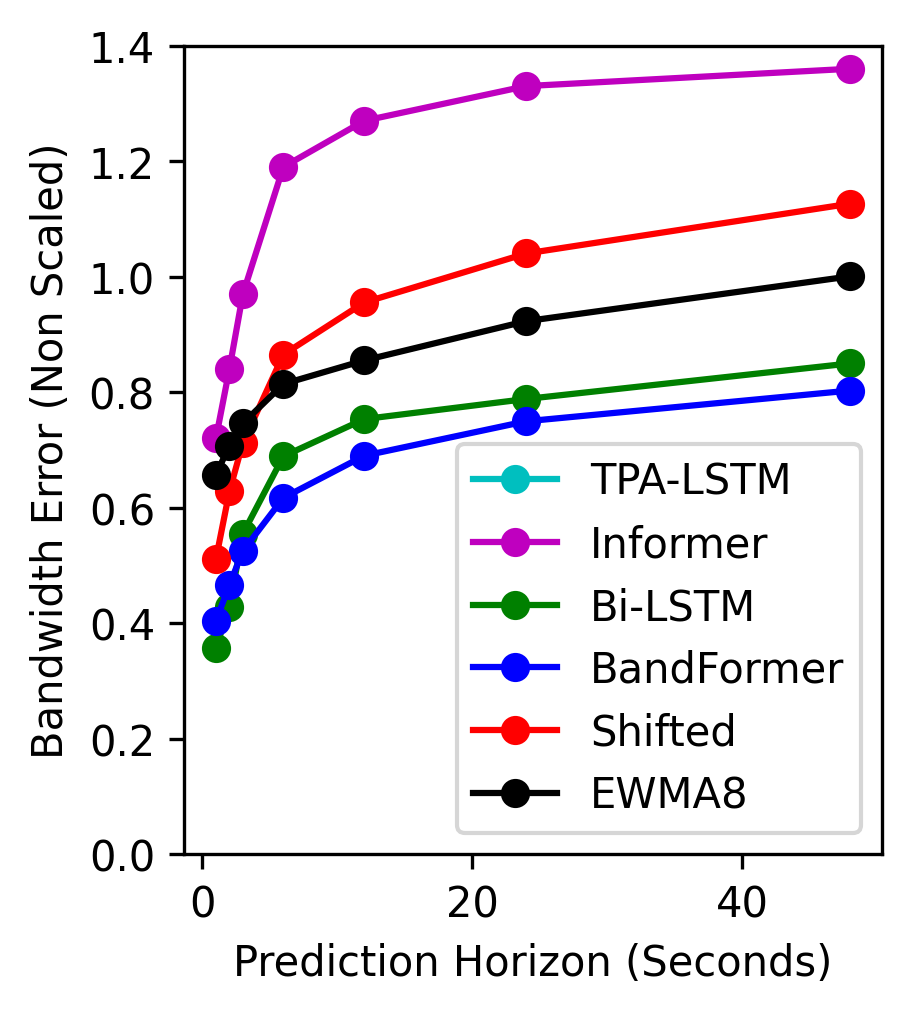

In [86]:
plt.figure(figsize=figure_size, dpi=300)
#plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.xlim(left=0, right=3)
plt.ylim(bottom=0, top=1.4)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Non Scaled)')
plt.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_rmse['Informer_based'], "-o", color="m", label="Informer")
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()#loc='lower right')
plt.savefig(f'plots/5GBeyond-comparison-RMSE.pdf', bbox_inches='tight')
plt.savefig(f'plots/5GBeyond-comparison-RMSE.png', bbox_inches='tight')

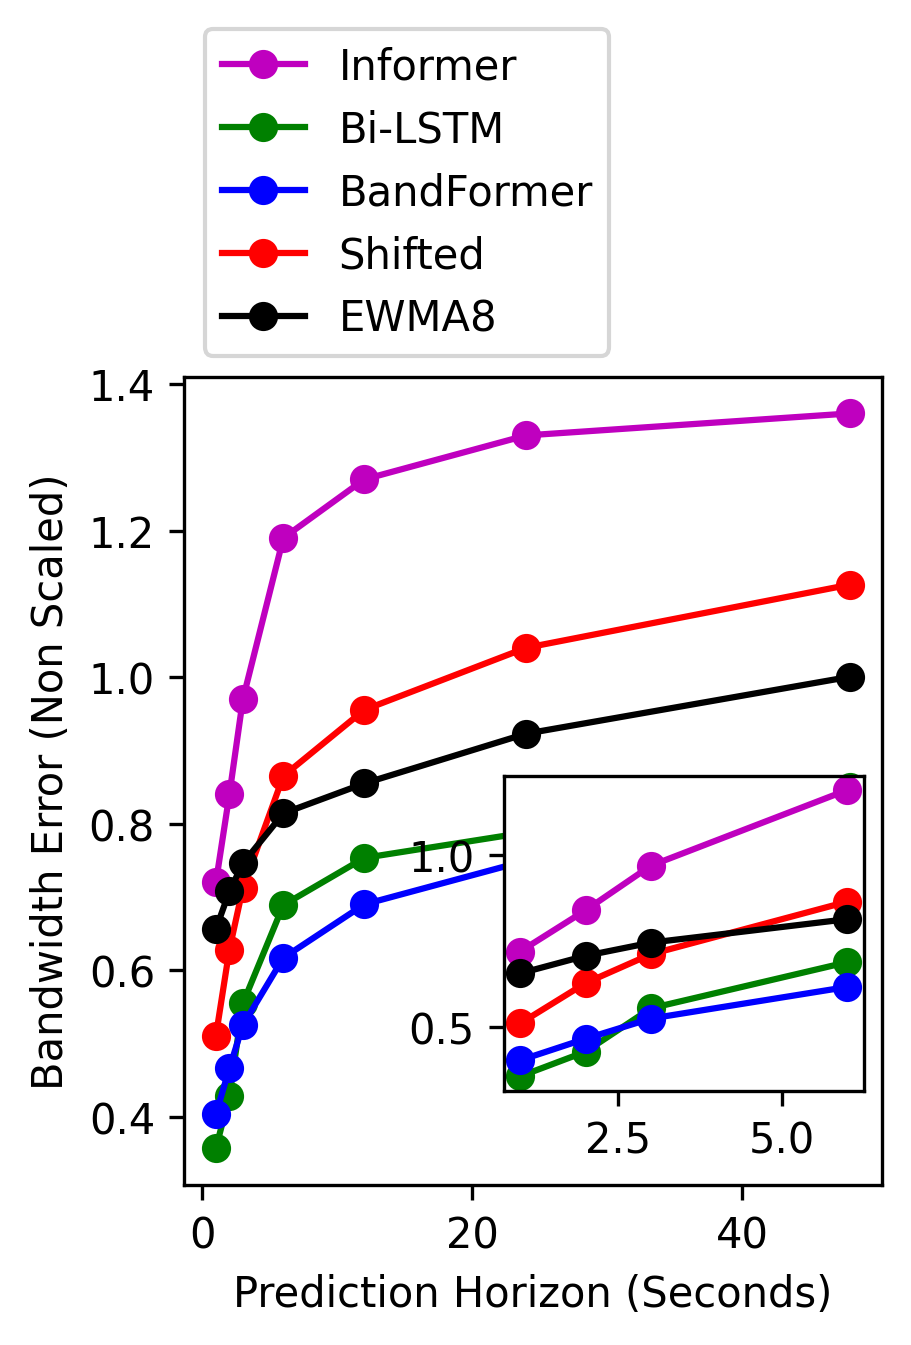

In [87]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=300)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth Error (Non Scaled)')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.48, 0.2, 0.4, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(index, df_rmse['Informer_based'], "-o", color="m", label="Informer")
ax1.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
ax1.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer")
ax1.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(0, 1))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)

scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_rmse['Informer_based'][scope_s:scope_e], "-o", color="m", label="Informer")
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8")

plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/5GBeyond-comparison-RMSE.pdf', bbox_inches='tight')

In [88]:
Informer_based_mae = [0.35, 0.42, 0.49, 0.63, 0.69, 0.73, 0.75]
Bi_LSTM_64_mae = [0.1506, 0.1804, 0.2378, 0.3049, 0.3359, 0.3701, 0.4261]

BandFormer_s_mae = [0.1768, 0.2104, 0.2473, 0.3141, 0.357, 0.3777, 0.3941]
EWMA8_mae = [0.290393856, 0.3146503505, 0.3336945106, 0.3693404093, 0.3927259626, 0.4305582726, 0.4782950598]
Shifted_mae = [0.183906715, 0.2389870136, 0.2805425006, 0.3611370254, 0.4113935681, 0.4618934898, 0.5163432928]
						
df_mae = pd.DataFrame(
    {'Informer_based': Informer_based_mae, 
     'Bi_LSTM_64': Bi_LSTM_64_mae, 
     'BandFormer_s': BandFormer_s_mae, 
     'EWMA8': EWMA8_mae,
     'Shifted': Shifted_mae,
     })
index = [1, 2, 3, 6, 12, 24, 48]
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,Informer_based,Bi_LSTM_64,BandFormer_s,EWMA8,Shifted
1,0.35,0.1506,0.1768,0.290394,0.183907
2,0.42,0.1804,0.2104,0.314650,0.238987
3,0.49,0.2378,0.2473,0.333695,0.280543
6,0.63,0.3049,0.3141,0.369340,0.361137
12,0.69,0.3359,0.3570,0.392726,0.411394
24,0.73,0.3701,0.3777,0.430558,0.461893
48,0.75,0.4261,0.3941,0.478295,0.516343


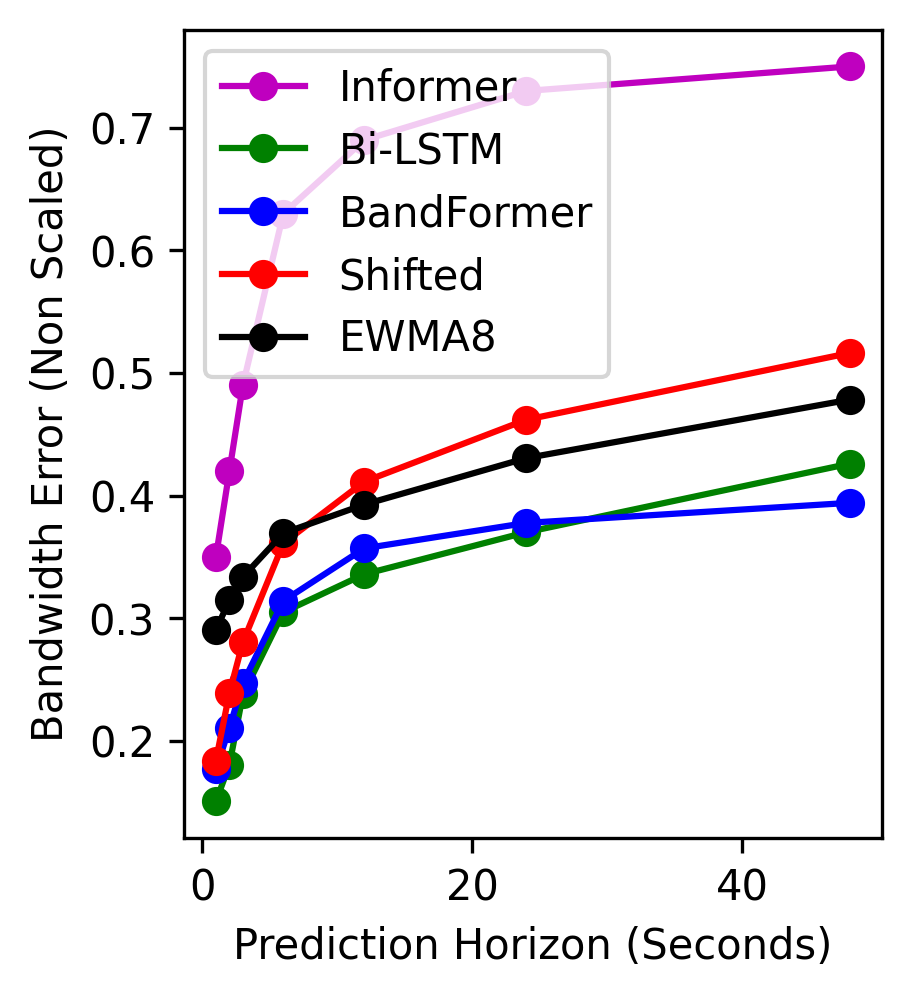

In [89]:
plt.figure(figsize=figure_size, dpi=300)
#plt.figure(layout='tight') #'constrained', 'compressed', 'tight',

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Non Scaled)')
plt.plot(index, df_mae['Informer_based'], "-o", color="m", label="Informer")
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_mae['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()#loc='lower right')
plt.savefig(f'plots/5GBeyond-comparison-MAE.pdf', bbox_inches='tight')
plt.savefig(f'plots/5GBeyond-comparison-MAE.png', bbox_inches='tight')

In [90]:
figure_size = (3*1.25, 2*1.25)

# BerlinV2X
Bi_LSTM_64_rmse = [10141641, 16637667, 20057925, 27786741, 38989106, 48978930, 52553570]
BandFormer_s_rmse = [11028894, 16771053, 20331898, 26564356, 34346408, 43255581, 49646154]
BandFormer_m_rmse = [11874909, 17021450, 19268100, 25143996, 32274912, 39443512, 45506362]
EWMA8_rmse = [22889596.21, 24785790.22, 26434553.65, 30433504.63, 36058372.66, 43202593.73, 50557729.86]
Shifted_rmse = [16400440.25, 19559764.26, 22079461.36, 27636718.57, 34875045.07, 43282808.74, 52009721.55]

df_rmse = pd.DataFrame(
    {'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'BandFormer_s': BandFormer_s_rmse,
     'BandFormer_m': BandFormer_m_rmse,
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })

df_rmse['Bi_LSTM_64'] = df_rmse['Bi_LSTM_64'].div(1024*1024)
df_rmse['BandFormer_s'] = df_rmse['BandFormer_s'].div(1024*1024)
df_rmse['BandFormer_m'] = df_rmse['BandFormer_m'].div(1024*1024)
df_rmse['EWMA8'] = df_rmse['EWMA8'].div(1024*1024)
df_rmse['Shifted'] = df_rmse['Shifted'].div(1024*1024)
index = [1, 2, 3, 6, 12, 24, 48]
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,Bi_LSTM_64,BandFormer_s,BandFormer_m,EWMA8,Shifted
1,9.671823,10.517973,11.324796,21.829220,15.640679
2,15.866916,15.994123,16.232920,23.637572,18.653645
3,19.128728,19.390009,18.375492,25.209955,21.056615
6,26.499501,25.333744,23.979183,29.023652,26.356429
12,37.182909,32.755287,30.779755,34.387944,33.259435
24,46.709948,41.251737,37.616264,41.201204,41.277703
48,50.118990,47.346262,43.398249,48.215608,49.600336


In [91]:
""" plt.figure(figsize=(4,3), dpi=200)

plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=51)
plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_rmse['BandFormer'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the Berlin V2X dataset (RMSE)')
plt.legend()#loc='lower right')
plt.savefig(f'plots/BerlinV2X-comparison-RMSE.pdf', bbox_inches='tight') """

' plt.figure(figsize=(4,3), dpi=200)\n\nplt.xlim(left=0, right=50)\nplt.ylim(bottom=0, top=51)\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\nplt.plot(index, df_rmse[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_rmse[\'BandFormer\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_rmse[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_rmse[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the Berlin V2X dataset (RMSE)\')\nplt.legend()#loc=\'lower right\')\nplt.savefig(f\'plots/BerlinV2X-comparison-RMSE.pdf\', bbox_inches=\'tight\') '

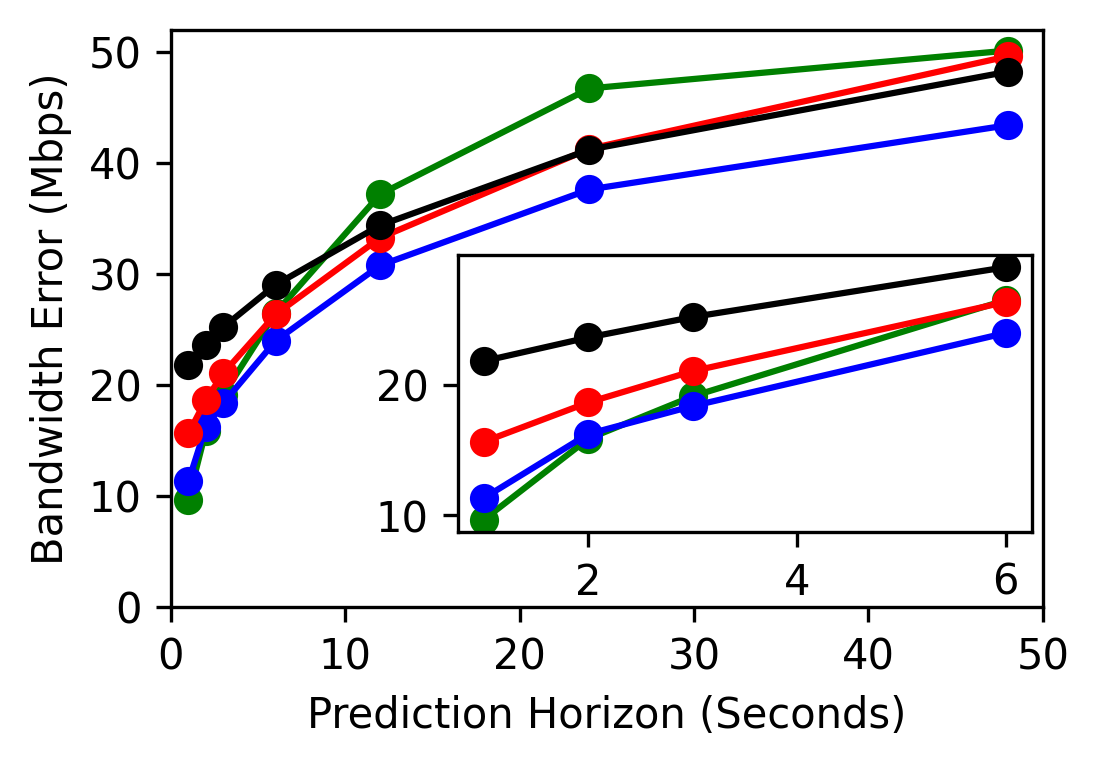

In [92]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=300)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth Error (Mbps)')
ax1.set_xlim(left=0, right=50)
ax1.set_ylim(bottom=0, top=52)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.38, 0.21, 0.51, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)

ax1.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
#ax1.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer_s")
ax1.plot(index, df_rmse['BandFormer_m'] , "-o", color="b", label="BandFormer")
ax1.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
#ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)

scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
#ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_m'][scope_s:scope_e] , "-o", color="b", label="BandFormer")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8")

plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')

fig.savefig(f'plots/BerlinV2X-comparison-RMSE.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-comparison-RMSE.png', bbox_inches='tight')

In [93]:
# BerlinV2X
Bi_LSTM_64_mae = [6635896, 11237023, 13636708, 19581077, 28570013, 36451336, 39881420]
BandFormer_s_mae = [7504334, 11361202, 14050361, 18922918, 24997514, 32540643, 38372951]
BandFormer_m_mae = [8494150, 11942786, 13199573, 17675412, 23873916, 30331708, 35605933]
EWMA8_mae = [16227346.39, 17577268.06, 18748625.05, 21686013.59, 25969784.99, 31642752.61, 38107204.06]
Shifted_mae = [11134327.44, 13336919.53, 15097698.03, 19124405.68, 24650194.42, 31489660.65, 39084605.38]

df_mae = pd.DataFrame(
    {'Bi_LSTM_64': Bi_LSTM_64_mae,
     'BandFormer_s': BandFormer_s_mae,
     'BandFormer_m': BandFormer_m_mae,
     'EWMA8': EWMA8_mae,
     'Shifted': Shifted_mae,
     })

df_mae['Bi_LSTM_64'] = df_mae['Bi_LSTM_64'].div(1024*1024)
df_mae['BandFormer_s'] = df_mae['BandFormer_s'].div(1024*1024)
df_mae['BandFormer_m'] = df_mae['BandFormer_m'].div(1024*1024)
df_mae['EWMA8'] = df_mae['EWMA8'].div(1024*1024)
df_mae['Shifted'] = df_mae['Shifted'].div(1024*1024)
index = [1, 2, 3, 6, 12, 24, 48]
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,Bi_LSTM_64,BandFormer_s,BandFormer_m,EWMA8,Shifted
1,6.328484,7.156691,8.100653,15.475603,10.618522
2,10.716460,10.834887,11.389528,16.762989,12.719078
3,13.004978,13.399468,12.588094,17.880082,14.398287
6,18.673970,18.046301,16.856586,20.681394,18.238455
12,27.246488,23.839487,22.767941,24.766717,23.508257
24,34.762703,31.033175,28.926571,30.176880,30.030881
48,38.033886,36.595298,33.956464,36.341862,37.273984


In [94]:
""" plt.figure()#figsize=(9, 6))#, dpi=300)

plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=40)
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_mae['BandFormer'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the Berlin V2X dataset (MAE)')
plt.legend(loc='lower right', prop={'size': 12})
plt.savefig(f'plots/BerlinV2X-comparison-MAE.pdf', bbox_inches='tight') """

' plt.figure()#figsize=(9, 6))#, dpi=300)\n\nplt.xlim(left=0, right=50)\nplt.ylim(bottom=0, top=40)\nplt.plot(index, df_mae[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_mae[\'BandFormer\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_mae[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_mae[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\nplt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the Berlin V2X dataset (MAE)\')\nplt.legend(loc=\'lower right\', prop={\'size\': 12})\nplt.savefig(f\'plots/BerlinV2X-comparison-MAE.pdf\', bbox_inches=\'tight\') '

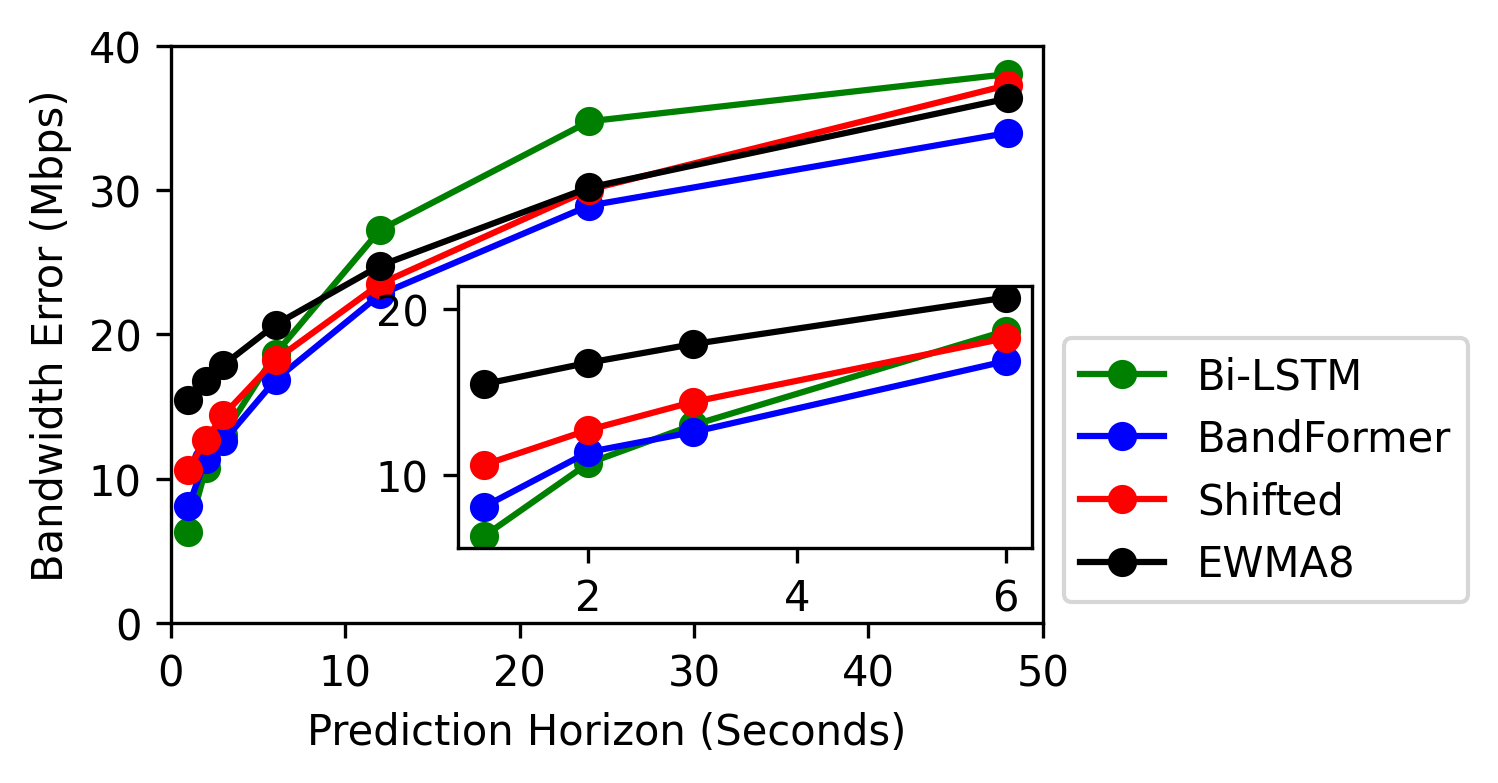

In [95]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=300)
#fig.legend(loc='outside upper right')
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth Error (Mbps)')
ax1.set_xlim(left=0, right=50)
ax1.set_ylim(bottom=0, top=40)
#plt.xlabel('Seconds')
#plt.ylabel('Bandwidth (Mbps)')
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.38, 0.21, 0.51, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)
# Plot
#ax1.plot(df[truth][:scope3] , color="red", label=truth)
#ax1.plot(df[prediction][:scope3], color="blue", label=prediction)

ax1.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
#ax1.plot(index, df_mae['BandFormer_s'] , "-o", color="b", label="BandFormer_s")
ax1.plot(index, df_mae['BandFormer_m'] , "-o", color="b", label="BandFormer")
ax1.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))

scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_mae['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
#ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_m'][scope_s:scope_e] , "-o", color="b", label="BandFormer")
ax2.plot(index[scope_s:scope_e], df_mae['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_mae['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8")

#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')

fig.savefig(f'plots/BerlinV2X-comparison-MAE.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-comparison-MAE.png', bbox_inches='tight')